<a href="https://colab.research.google.com/github/areebaxijaz/AER850-Project-2/blob/main/AER850Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Prompt user to upload a folder
uploaded = files.upload()

Saving ProjecttwoData.zip to ProjecttwoData.zip


In [ ]:
!unzip /content/ProjecttwoData.zip

**bold text**##Part 1: Steps 1-4 (Data Processing, Model Building, Training, and Evaluation)

In [ ]:
# Importing required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Step 1: Data Processing

# Set the image size and batch size
IMG_WIDTH, IMG_HEIGHT = 500, 500
BATCH_SIZE = 32

# Define data directories
train_dir = '/content/Data/train'
validation_dir = '/content/Data/valid'
test_dir = '/content/Data/test'

In [ ]:
# Creating train and validation datasets from directories
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    label_mode='categorical'  # for multi-class classification
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)


Found 1942 files belonging to 3 classes.
Found 431 files belonging to 3 classes.


In [ ]:
# Data augmentation for training data
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),         # Rescaling images
    tf.keras.layers.RandomFlip("horizontal"),  # Randomly flip images horizontally
    tf.keras.layers.RandomRotation(0.1),       # Randomly rotate images
    tf.keras.layers.RandomZoom(0.1)            # Randomly zoom images
])


In [ ]:
# Only rescaling for validation data
validation_dataset = validation_dataset.map(lambda x, y: (x / 255.0, y))

# Apply data augmentation to the training dataset
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))

In [ ]:
# Step 2: Neural Network Architecture Design

# Define the model
model = Sequential()

# Convolutional layers with MaxPooling and Dropout
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the results and add dense layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # 3 output classes: crack, missing-head, paint-off

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Step 3: Hyperparameter Analysis
# Compile the model with chosen hyperparameters
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
# Step 4: Model Evaluation
# Train the model and store the training history
epochs = 20
history = model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=validation_dataset
)

Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.4094 - loss: 1.7052 - val_accuracy: 0.6404 - val_loss: 0.7567
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.5859 - loss: 0.8515 - val_accuracy: 0.6798 - val_loss: 0.7094
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.6552 - loss: 0.7734 - val_accuracy: 0.6520 - val_loss: 0.7026
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.6490 - loss: 0.7959 - val_accuracy: 0.6357 - val_loss: 0.7167
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.6768 - loss: 0.7859 - val_accuracy: 0.6682 - val_loss: 0.6859
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.6758 - loss: 0.7035 - val_accuracy: 0.6566 - val_loss: 0.6615
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.6850 - loss: 0.7152 - val_accuracy: 0.6404 - val_loss: 0.7415
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.7091 - loss: 0.6447 - val_accuracy: 0.6821 - v

In [ ]:

# Plotting training and validation loss and accuracy
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

Text(0.5, 1.0, 'Accuracy')

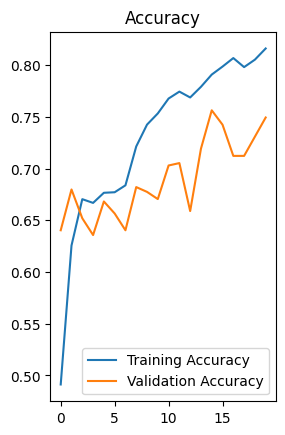

In [ ]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

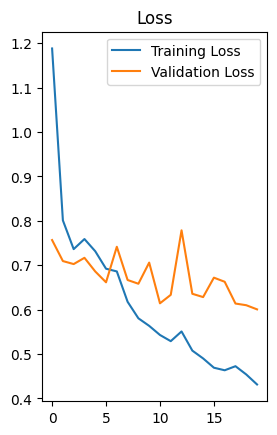

In [ ]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

##Part 2: Step 5 (Testing the Model on New Images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


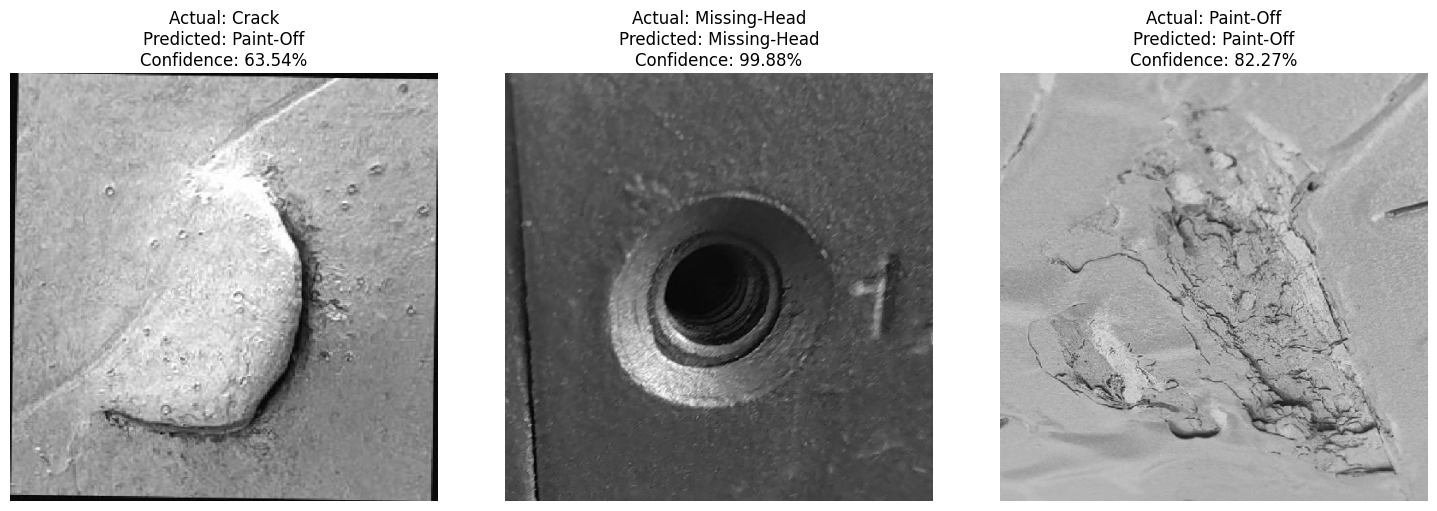

In [ ]:

# Importing required packages for model testing
from tensorflow.keras.preprocessing import image

# Define image size
IMG_WIDTH, IMG_HEIGHT = 500, 500

# Class labels (in the same order as they were used during training)
class_labels = ['Crack', 'Missing-Head', 'Paint-Off']

# Function to load, preprocess, and predict the class of an image
def process_and_predict(img_path):
    # Load the image and resize it to match the input shape of the model
    img = image.load_img(img_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
    # Convert the image to an array and normalize it
    img_array = image.img_to_array(img) / 255.0
    # Add a batch dimension to the image
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class of the image
    prediction = model.predict(img_array)
    # Find the index of the class with the highest probability
    predicted_class = np.argmax(prediction, axis=1)[0]
    confidence = np.max(prediction) * 100  # Confidence level

    return img, predicted_class, confidence
# Test images paths
test_images = [
    ('/content/Data/test/crack/test_crack.jpg','Crack'),
    ('/content/Data/test/missing-head/test_missinghead.jpg','Missing-Head'),
    ('/content/Data/test/paint-off/test_paintoff.jpg','Paint-Off')
]
# Plotting the test images with actual and predicted labels
fig, axes = plt.subplots(1, len(test_images), figsize=(15, 5))
for i, (img_path, true_label) in enumerate(test_images):
    # Process and predict each test image
    img, predicted_class, confidence = process_and_predict(img_path)

    # Display the image
    axes[i].imshow(img)
    axes[i].axis('off')

    # Set the title with the actual label, predicted label, and confidence
    predicted_label = class_labels[predicted_class]
    axes[i].set_title(f"Actual: {true_label}\nPredicted: {predicted_label}\nConfidence: {confidence:.2f}%")

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Save model as a single .h5 file
model.save('model.h5')